# Autoencoders Come from Artificial Neural Network


An autoencoder is a special type of neural network that copies the input values to the output values. It does not require the target variable like the conventional Y, thus it is categorized as unsupervised learning. You may ask why we train the model if the output values are set to equal to the input values. 

Indeed, we are not so much interested in the output layer. We are interested in the hidden core layer. If the number of neurons in the hidden layers is less than that of the input layers, the hidden layers will extract the essential information of the input values. This condition forces the hidden layers to learn the most patterns of the data and ignore the “noises”.

So in an autoencoder model, the hidden layers must have fewer dimensions than those of the input or output layers. If the number of neurons in the hidden layers is more than those of the input layers, the neural network will be given too much capacity to learn the data. In an extreme case, it could just simply copy the input to the output values, including noises, without extracting any essential information.


The encoding and decoding process. The encoding process compresses the input values to get to the core layer. The decoding process reconstructs the information to produce the outcome. The decoding process mirrors the encoding process in the number of hidden layers and neurons. Most practitioners just adopt this symmetry.


**What Are the Applications of Autoencoders?**

The early application of autoencoders is dimensionality reduction. A milestone paper by Geoffrey Hinton (2006) showed a trained autoencoder yielding a smaller error compared to the first 30 principal components of a PCA and a better separation of the clusters. Autoencoders also have wide applications in computer vision and image editing. In image coloring, autoencoders are used to convert a black-and-white image to a colored image. In image noise reduction, autoencoders are used to remove noises. See my post “Convolutional Autoencoders for Image Noise Reduction”.



**Why Do We Apply Dimensionality Reduction to Find Outliers?**

Don’t we lose some information, including the outliers, if we reduce the dimensionality? The answer is once the main patterns are identified, the outliers are revealed. Many distance-based techniques (e.g. KNNs) suffer the curse of dimensionality when they compute distances of every data point in the full feature space. High dimensionality has to be reduced. Interestingly, during the process of dimensionality reduction outliers are identified. We can say outlier detection is a by-product of dimension reduction.


**Why Autoencoders?**

There are already many useful tools such as Principal Component Analysis (PCA) to detect outliers, why do we need the autoencoders? Recall that the PCA uses linear algebra to transform (see this article “Dimension Reduction Techniques with Python”). In contrast, the autoencoder techniques can perform non-linear transformations with their non-linear activation function and multiple layers. It is more efficient to train several layers with an autoencoder, rather than training one huge transformation with PCA. The autoencoder techniques thus show their merits when the data problems are complex and non-linear in nature.

# Build the Model


 Recall that in an autoencoder model the number of the neurons of the input and output layers corresponds to the number of variables, and the number of neurons of the hidden layers is always less than that of the outside layers. An example with more variables will allow me to show you a different number of hidden layers in the neural networks.

In [4]:
import numpy as np
import pandas as pd
from pyod.models.knn import KNN
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data
#from pyod.utils.data import evaluate_print
#from pyod.utils.example import visualize

ModuleNotFoundError: No module named 'pyod'

In [3]:
# import the tidy data from the Step #2
df=pd.read_csv('step2-output-cleaned.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'step2-output-cleaned.csv'

In [3]:
df.head()

,date,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [4]:
df.shape

(219521, 53)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219521 entries, 0 to 219520
Data columns (total 53 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            219521 non-null  object 
 1   sensor_00       219521 non-null  float64
 2   sensor_01       219521 non-null  float64
 3   sensor_02       219521 non-null  float64
 4   sensor_03       219521 non-null  float64
 5   sensor_04       219521 non-null  float64
 6   sensor_05       219521 non-null  float64
 7   sensor_06       219521 non-null  float64
 8   sensor_07       219521 non-null  float64
 9   sensor_08       219521 non-null  float64
 10  sensor_09       219521 non-null  float64
 11  sensor_10       219521 non-null  float64
 12  sensor_11       219521 non-null  float64
 13  sensor_12       219521 non-null  float64
 14  sensor_13       219521 non-null  float64
 15  sensor_14       219521 non-null  float64
 16  sensor_16       219521 non-null  float64
 17  sensor_17 

In [6]:
# Let's convert the data type of timestamp column to datatime format
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sensor_00,219521.0,2.371961,0.403223,0.000000,2.417187,2.455556,2.499826,2.549016
sensor_01,219521.0,47.590015,3.299447,0.000000,46.310760,48.133678,49.479160,56.727430
sensor_02,219521.0,50.863387,3.668355,33.159720,50.390620,51.649300,52.777770,56.032990
sensor_03,219521.0,43.746718,2.417856,31.640620,42.838539,44.227428,45.225693,48.220490
sensor_04,219521.0,590.629672,144.127709,2.798032,626.620400,632.754600,637.615723,800.000000
sensor_05,219521.0,73.397642,17.304487,0.000000,69.982320,75.578420,80.918750,99.999880
sensor_06,219521.0,13.500351,2.143252,0.014468,13.346350,13.628470,14.539930,22.251160
sensor_07,219521.0,15.841237,2.176726,0.000000,15.856480,16.167530,16.427950,23.596640
sensor_08,219521.0,15.198273,2.015901,0.028935,15.183740,15.451390,15.697340,24.348960
sensor_09,219521.0,14.796988,2.072470,0.000000,15.010130,15.082470,15.118630,25.000000


In [8]:
df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
date,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [9]:
df2 = df.drop(['machine_status'], axis=1)
names=df2.columns
X = df[names]
y = df.drop(df2.columns, axis=1)

In [10]:
y.head()

,machine_status
date,
2018-04-01 00:00:00,NORMAL
2018-04-01 00:01:00,NORMAL
2018-04-01 00:02:00,NORMAL
2018-04-01 00:03:00,NORMAL
2018-04-01 00:04:00,NORMAL


In [12]:
from sklearn.model_selection import train_test_split
# Training and Test Split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

**Standardize the variables before modeling. The code below first standardizes the variables, then create the train and test datasets.**

In [13]:
#When you do unsupervised learning, it is always a safe step to standardize the predictors
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train)    # Only the training data are used to fit the scaler transformation,
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)  # then the scaler is used to transform the test input data.
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

To give you a good sense of what the data look like, I apply the Principal Component Analysis (PCA) to reduce to two dimensions and plot accordingly.

In [15]:
from sklearn.decomposition import PCA
pca = PCA(2)
x_pca = pca.fit_transform(X_train)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2']
x_pca.head()

# Plot
#import matplotlib.pyplot as plt
#plt.scatter(X_train[0], X_train[1], alpha=0.8) 
#plt.title('Scatter plot')
#plt.xlabel('PC1')
#plt.ylabel('PC2')
#plt.show()

,PC1,PC2
0,-404.367643,-38.518079
1,-163.648605,91.645248
2,-189.869649,-489.743927
3,-258.465122,397.352760
4,-217.282018,65.684340


Model specification: Hyper-parameter testing in a neural network model deserves a separate article. Because the goal of this article is to walk you through the entire process, I will just build three plain-vanilla models with different number of layers:

* Model 1: [25, 2, 2, 25]. The input layer and the output layer has 25 neurons each. There are two hidden layers, each has two neurons.
* Model 2: [25, 10, 2, 10, 25]. Besides the input layer and output layers, there are three hidden layers with 10, 2, and 10 neurons respectively.
* Model 3: [25, 15, 10, 2, 10, 15, 25]. There are five hidden layers with 15, 10, 2, 10, 15 neurons respectively.


I will purposely repeat the same procedure for Model 1, 2, and 3. Feel free to skim through Model 2 and 3 if you get a good understanding from Model 1.

#### Model 1 — Step 1 — Build Your Model


In [18]:
clf1 = AutoEncoder(hidden_neurons =[25, 2, 2, 25])
clf1.fit(X_train_scaled)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 51)                2652      
_________________________________________________________________
dropout_6 (Dropout)          (None, 51)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 51)                2652      
_________________________________________________________________
dropout_7 (Dropout)          (None, 51)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 25)                1300      
_________________________________________________________________
dropout_8 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[25, 2, 2, 25],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x0000018E30CC0EE0>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

#### Model 1 — Step 2 — Determine the Cut Point
Let’s apply the trained model Clf1 to predict the anomaly score for each observation in the test data. How do we define an outlier? An outlier is a point that is distant from other points, so the outlier score is defined by distance. The PyOD function .decision_function() calculates the distance or the anomaly score for each data point.

In [19]:
y_train_scores = clf1.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf1.predict(X_test_scaled)  # outlier labels (0 or 1)
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf1.decision_function(X_test_scaled)  # outlier scores

y_test_pred = pd.Series(y_test_pred)
y_test_scores = pd.Series(y_test_scores)

We will use the predicted anomaly scores of the training data to get the histogram.

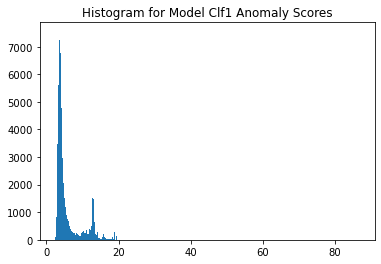

In [20]:
import matplotlib.pyplot as plt
plt.hist(y_train_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()

If we use a histogram to count the frequency by the anomaly score, we will see the high scores corresponds to low frequency — the evidence of outliers. We choose 20 to be the cut point and those >=20 to be outliers.

#### Model 1 — Step 3 — Get the Summary Statistics by Cluster
Let’s assign those observations with less than 20 anomaly scores to Cluster 0, and to Cluster 1 for those above 20 (see how I use np.where() in the code). I calculate the summary statistics by cluster using .groupby() . This model has identified 50 outliers (not shown).

In [22]:
df_test = X_test_scaled.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<20, 0, 1)
df_test['cluster'].value_counts()

df_test.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,score
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.008500,0.006637,0.006337,0.005261,0.007613,0.013032,0.013615,0.011681,0.011291,0.007598,...,-0.030426,-0.012857,-0.012966,-0.015635,-0.008032,0.002301,-0.006606,0.007735,0.008431,5.792032
1,-2.225465,-1.063255,-1.727927,-1.616986,-2.264927,-2.940416,-2.276869,-1.061526,-0.898760,-0.788285,...,9.264857,2.655469,2.431000,4.267756,2.228357,-0.661604,0.751206,-1.782688,-0.994318,32.728941


The following output shows the mean variable values in each cluster. The values of Cluster ‘1’ (the abnormal cluster) is quite different from those of Cluster ‘0’ (the normal cluster). The “score” values show the average distance of those observations to others. A high “score” means that observation is far away from the norm.

Don’t you love the Step 1–2–3 instruction to find anomalies? If you feel good about the three-step process, you can skim through Model 2 and 3.

## Aggregate to Achieve Model Stability
You may wonder why I go with a great length to produce the three models. Here let me reveal the reason: Although unsupervised techniques are powerful in detecting outliers, they are prone to overfitting and unstable results. The solution is to train multiple models then aggregate the scores. In the aggregation process, you still will follow Step 2 and 3 like before.

There are four methods to aggregate the outcome as below: 
* Average: average scores of all detectors.    
* Maximum of Maximum (MOM)
* Average of Maximum (AOM)
* Maximum of Average (MOA)

...

....